# Lesson 05 - Starter Code

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import statsmodels.formula.api as smf

# read in the mammal dataset
wd = '../../assets/dataset/msleep/'
mammals = pd.read_csv(wd+'msleep.csv')
mammals = mammals[mammals.brainwt.notnull()].copy()

# Part 1:
Explore our mammals dataset

In [3]:
mammals.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.0,0.09820,14.800


In [4]:
mammals.columns

Index([u'name', u'genus', u'vore', u'order', u'conservation', u'sleep_total',
       u'sleep_rem', u'sleep_cycle', u'awake', u'brainwt', u'bodywt'],
      dtype='object')

### Check 1. Distribution

#### Lets check out a scatter plot of body wieght and brain weight

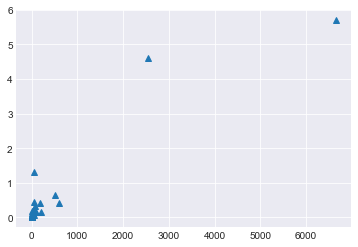

In [5]:
# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(mammals.bodywt, mammals.brainwt, '^')
# show the plot
plt.show()

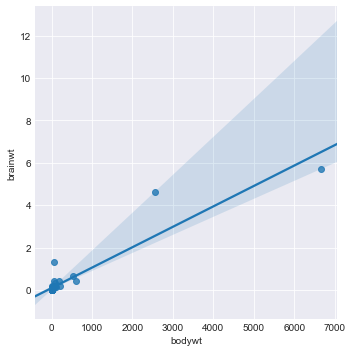

In [6]:
sns.lmplot('bodywt', 'brainwt', mammals)

### Log transformation can help here. 
Curious about the math? http://onlinestatbook.com/2/transformations/log.html

**Un-comment this to see the impact of the log transformation** 

Tip- highlight the desired rows and hit "command /" 



In [7]:
log_columns = ['bodywt', 'brainwt',]
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

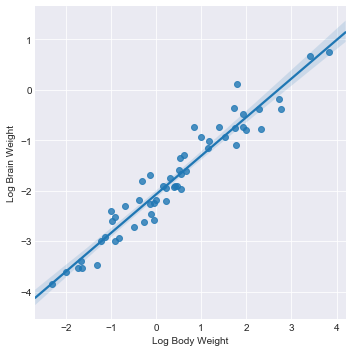

In [8]:
g = sns.lmplot('bodywt', 'brainwt', log_mammals)
g.set_axis_labels( "Log Body Weight", "Log Brain Weight")

#### How does this look?

Answer: A lot more more "linear" than it was before.

# Part 1
Update and complete the code below to use lmplot and display correlations between body weight and two dependent (outcome) variables: sleep_rem and awake.


##### Complete below for 2 new models: 
With body weight as the predictor (x) and the outcome (y) set as:  
Model 1. sleep_rem  
Model 2. awake

In [11]:
#1. add any additional variables that you would like to take the log of
log_columns = ['bodywt', 'brainwt', 'sleep_rem']  # any others?
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)



#### Create the lmplots
REPLACE X (independent variable/predictor) and Y (dependent/outcome) below with your variables!

This is starter code for model 1 looking at Body weight predicting Sleep REM. Repeat with model 2

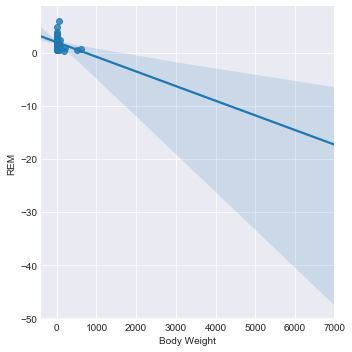

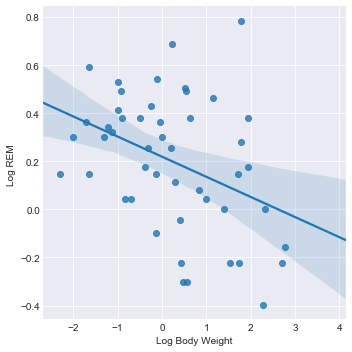

In [12]:
g = sns.lmplot("bodywt", "sleep_rem", mammals)
g.set_axis_labels( "Body Weight", "REM")
g = sns.lmplot("bodywt", "sleep_rem", log_mammals)
g.set_axis_labels( "Log Body Weight", "Log REM ")

#### play around with other outcomes

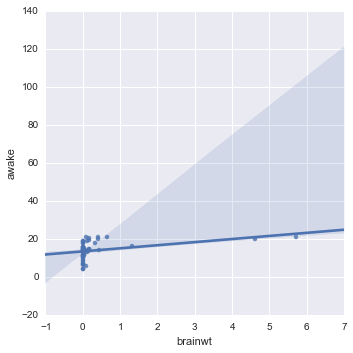

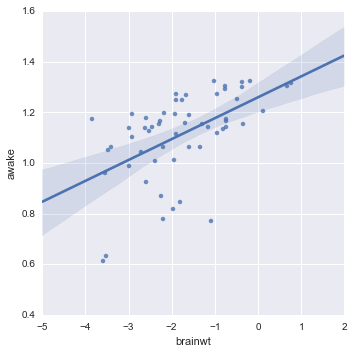

In [19]:
log_columns = ['bodywt', 'brainwt', 'awake', 'sleep_rem']  # any others?
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

# one other example, using brainwt and awake.
x = 'brainwt'
y = 'awake'
sns.lmplot(x, y, mammals)
sns.lmplot(x, y, log_mammals)

### Should we log tranform our data? 
Answer: Yes, the data looks a lot better for applying OLS when we log transform it.

##### Let's take a look at both models to compare the impact on OLS

In [13]:
# not transformed

X = mammals[['bodywt']]
y = mammals['brainwt']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=mammals).fit()
#print the full summary
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     367.7
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           9.16e-26
Time:                        11:42:22   Log-Likelihood:                -20.070
No. Observations:                  56   AIC:                             44.14
Df Residuals:                      54   BIC:                             48.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0859      0.048      1.782      0.080      -0.011       0.183
X              0.0010   5.03e-05     19.176      0.000       0.001       0.001
==============================================================================
Omnibus:                       85.068   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1330.630
Skew:                           4.258   Prob(JB):                    1.14e-289
Kurtosis:                      25.311   Cond. No.                         981.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our output tells us that:

* The relationship between bodywt and brainwt isn't random (p value approaching 0)  
* With this current model, brainwt is roughly bodywt * 0.0010
* The model explains, roughly, 87% of the variance of the dataset 

### Student: repeat with the log transformation

In [15]:
# Log transformed
X = log_mammals[["bodywt"]]
y = log_mammals["brainwt"]

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula = 'y ~ X', data = log_mammals).fit()

#print the full summary
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     738.4
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           3.56e-33
Time:                        11:47:41   Log-Likelihood:                -8.9817
No. Observations:                  56   AIC:                             21.96
Df Residuals:                      54   BIC:                             26.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0739      0.040    -51.463      0.000      -2.155      -1.993
X              0.7652      0.028     27.173      0.000       0.709       0.822
==============================================================================
Omnibus:                        4.775   Durbin-Watson:                   2.240
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                4.060
Skew:                           0.653   Prob(JB):                        0.131
Kurtosis:                       3.193   Cond. No.                         1.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What does our output tell us?

Answer: 
* There is a statistically significant relationship between the log of brainwt and log of bodywt. 
* The log of brainwt is 0.765 the log of bodywt
* The model explains roughly 93% of the variance


### Prediction- predict a brainwt based on bodywt

In [16]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'X': [50]})
X_new.head()

,X
0,50


In [17]:
lm.predict(X_new)

0    36.184157
dtype: float64

# Part 2: Multiple Regression Analysis using citi bike data 

In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the y variable.

We'll work with bikeshare data to showcase what this means and to explain a concept called multicollinearity.

In [18]:
wd = '../../assets/dataset/bikeshare/'
bike_data = pd.read_csv(wd+'bikeshare.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Check 2. Multicollinearity

With the bike share data, let's compare three data points: actual temperature, "real feel" temperature, and guest ridership. 

Our data is already normalized between 0 and 1, so we'll start off with the correlations and modeling.

## Students: 
using the code from the demo create a correlation heat map comparing 'temp', 'atemp', 'casual'

            temp     atemp    casual
temp    1.000000  0.987672  0.459616
atemp   0.987672  1.000000  0.454080
casual  0.459616  0.454080  1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


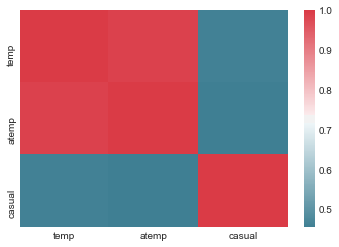

In [19]:
#cmap...
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = bike_data[['temp', 'atemp', 'casual']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

#### Question: What did we find? Was there multicollinearity? 

#### The correlation matrix explains that:


Answer: betqeen temp and atemp, there's almost perfect correlation, so multicolinearity exists.

# Part 3- Prepping our Data
With a partner, complete this code together and visualize the correlations of all the numerical features built into the data set.

We want to:
- Id categorical variables
- Create dummies (weather situation is done for you in the starter code)
- Find at least two more features that are not correlated with current features, but could be strong indicators for predicting guest riders.

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt', u'weather_1',
       u'weather_2', u'weather_3', u'weather_4'],
      dtype='object')
               temp  weather_1  weather_2  weather_3
temp       1.000000   0.101044  -0.069657  -0.062406
weather_1  0.101044   1.000000  -0.822961  -0.412414
weather_2 -0.069657  -0.822961   1.000000  -0.177417
weather_3 -0.062406  -0.412414  -0.177417   1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


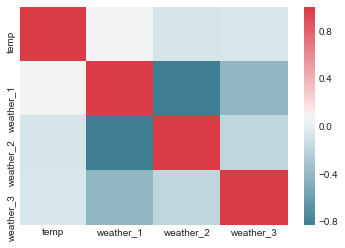

In [20]:
#starter code (hints!)

#Dummies example: 
weather = pd.get_dummies(bike_data.weathersit)
#create new names for our new dummy variables
weather.columns = ['weather_' + str(i) for i in weather.columns]
#join those new variables back into the larger dataset
bikemodel_data = bike_data.join(weather)
print bikemodel_data.columns

#Select columns to keep. Don't forget to set a reference category for your dummies (aka drop one)
columns_to_keep = ['temp', 'weather_1', 'weather_2', 'weather_3'] #[which_variables?]

#checking for colinearity
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bikemodel_data[columns_to_keep].corr()# what are we getting the correlations of?
print correlations
print sns.heatmap(correlations, cmap=cmap)





#### Draw a conceptual map (on paper is fine) and make predictions for what variables will influence ridership
1. What variables do you think will have the strongest influence? 
2. Are their any variables you want to combine into other categories? 
    i.e., How are you gonig to handle the hours? Do you wnat to keep all 24 hours? or is there     a better grouping? 
3. What other prep work do you think would helpful to get this data ready for model building? 
    Think about checking for missing data. Checking for outliers. etc. 

#### If you think changes are necessary. Make them below: 